In [28]:
from ontology import MarketOntology


In [33]:
# Create instance of MarketOntology
onto = MarketOntology()

# Test adding some market knowledge
onto.add_market_knowledge(
    subject_type="Event",
    subject_name="PriceIncrease",
    predicate="influences",
    object_type="MarketTrend",
    object_name="Bearish"
)

# Add more test data
onto.add_market_knowledge(
    subject_type="Product",
    subject_name="iPhone",
    predicate="hasSentiment",
    object_type="Sentiment",
    object_name="Positive"
)

# Export and display the knowledge graph
knowledge_json = onto.export_knowledge()




In [36]:
# Get knowledge in simplified format
data = json.loads(onto.export_knowledge())

# Print in readable format
for item in data:
    if "@type" in item:
        type_name = item["@type"][0].split("#")[-1]
        id_name = item["@id"].split("#")[-1]
        print(f"\nType: {type_name}")
        print(f"ID: {id_name}")

        # Print relationships
        for key, value in item.items():
            if key not in ["@type", "@id"]:
                rel = key.split("#")[-1]
                obj = value[0]["@id"].split("#")[-1]
                print(f"Relationship: {rel} -> {obj}")


Type: Class
ID: Product

Type: Product
ID: Product_iPhone
Relationship: hasSentiment -> Sentiment_Positive

Type: Class
ID: Event

Type: ObjectProperty
ID: relatedTo

Type: Class
ID: Sentiment

Type: ObjectProperty
ID: hasSentiment

Type: Event
ID: Event_PriceIncrease
Relationship: influences -> MarketTrend_Bearish

Type: Class
ID: Brand

Type: ObjectProperty
ID: influences

Type: Sentiment
ID: Sentiment_Positive

Type: MarketTrend
ID: MarketTrend_Bearish

Type: Class
ID: MarketTrend


In [23]:
# Test querying the ontology
print("\nAvailable concepts:")
for concept_name, concept_uri in onto.concepts.items():
    print(f"{concept_name}: {concept_uri}")


Available concepts:
Product: http://example.org/market#Product
Brand: http://example.org/market#Brand
Sentiment: http://example.org/market#Sentiment
MarketTrend: http://example.org/market#MarketTrend
Event: http://example.org/market#Event


In [8]:
# Add a complete market analysis example
onto.add_market_knowledge(
    subject_type="Event",
    subject_name="MarketAnalysis_001",
    predicate="hasRecommendation",
    object_type="MarketTrend",
    object_name="Bullish"
)

# Export and print in a more readable format
import json
knowledge_data = json.loads(onto.export_knowledge())
print(json.dumps(knowledge_data, indent=2))

[
  {
    "@id": "http://example.org/market#Product",
    "@type": [
      "http://www.w3.org/2002/07/owl#Class"
    ]
  },
  {
    "@id": "http://example.org/market#Product_iPhone",
    "@type": [
      "http://example.org/market#Product"
    ],
    "http://example.org/market#hasSentiment": [
      {
        "@id": "http://example.org/market#Sentiment_Positive"
      }
    ]
  },
  {
    "@id": "http://example.org/market#MarketTrend_Bullish",
    "@type": [
      "http://example.org/market#MarketTrend"
    ]
  },
  {
    "@id": "http://example.org/market#Event",
    "@type": [
      "http://www.w3.org/2002/07/owl#Class"
    ]
  },
  {
    "@id": "http://example.org/market#relatedTo",
    "@type": [
      "http://www.w3.org/2002/07/owl#ObjectProperty"
    ]
  },
  {
    "@id": "http://example.org/market#MarketTrend",
    "@type": [
      "http://www.w3.org/2002/07/owl#Class"
    ]
  },
  {
    "@id": "http://example.org/market#Sentiment",
    "@type": [
      "http://www.w3.org/2002/07

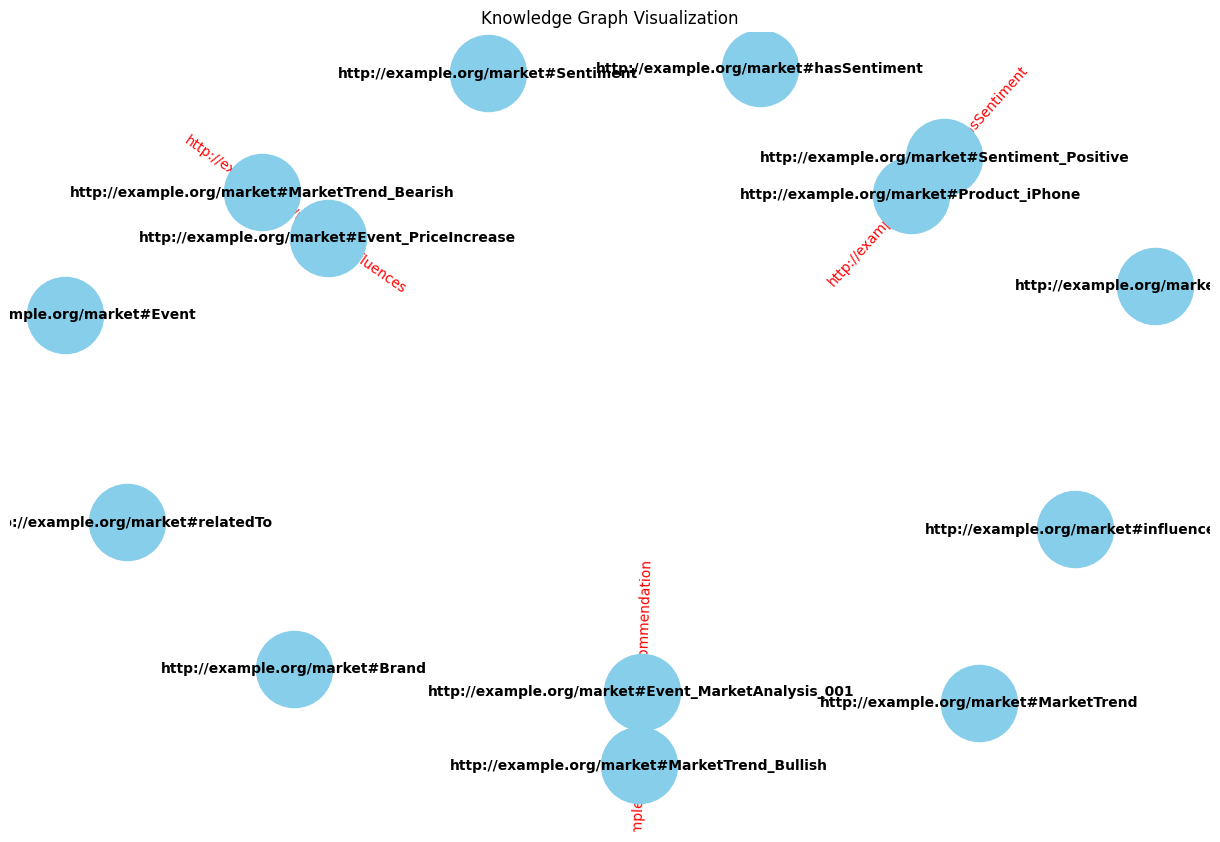

In [10]:
import networkx as nx


import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the knowledge data
for item in knowledge_data:
    subject = item['@id']
    G.add_node(subject)
    for predicate, objects in item.items():
        if predicate.startswith('http://') and isinstance(objects, list):
            for obj in objects:
                if '@id' in obj:
                    G.add_edge(subject, obj['@id'], label=predicate)

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title('Knowledge Graph Visualization')
plt.show()